In [0]:
import numpy as np
from numpy.random import rand
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Create random number 
def createUniformNumbers(start, stop, numberOfPoints):
    d1 = np.random.uniform(start, stop, numberOfPoints)
    d2 = np.random.uniform(start, stop, numberOfPoints)
    return d1, d2

def targetFunction(d1,d2):
    d3 = d1 + 2*d2 -2
    d4 = np.sign(d3)
    d4 = d4.astype(int)
    return d4

In [0]:
def predictionFunction(w,x1,x2):
    r = w[0] + w[1]*x1 + w[2]*x2
    r = np.sign(r)
    r = r.astype(int)
    return r

def perceptronAlgorithm(d1,d2,res):
    w = rand(3) + 0.5

    predicted = predictionFunction(w, d1, d2)
    numOfMissPredictions = np.sum(predicted != res)
    count = 0
    while(numOfMissPredictions > 0):
        count = count + 1
        isPredictionWrong = (predicted != res)
        occurences = np.where(isPredictionWrong==True)
        firstIndex = occurences[0][0]
        x = np.array([1, d1[firstIndex], d2[firstIndex]])
        y = res[firstIndex]

        for i in range(w.size):
            temp = w[i] + y*x[i]
            w[i] = temp
        
        predicted = predictionFunction(w, d1, d2)
        numOfMissPredictions = np.sum(predicted != res)

    print(count)
    return w

In [0]:
def plotPoints(d1, d2, res, start, stop):

    d5 = d1[np.where(res > 0)]
    d6 = d2[np.where(res > 0)]
    d7 = d1[np.where(res < 0)]
    d8 = d2[np.where(res < 0)]

    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(111)

    ax1.scatter(d5, d6, s=20, c='b', marker="s", label='positive')
    ax1.scatter(d7, d8, s=20, c='r', marker="o", label='negative')
    slope = -(-2/2)/(-2/1)  
    intercept = 2/2  
    a1 = np.arange(start-1, stop+1)
    f1 = a1*slope + intercept
    ax1.plot(a1,f1)

    w = perceptronAlgorithm(d1,d2,res)
    slope2 = -(w[0]/w[2])/(w[0]/w[1])  
    intercept2 = -w[0]/w[2]
    a2 = np.arange(start-1, stop+1)
    f2 = a2*slope2 + intercept2
    ax1.plot(a2,f2)

    plt.legend(loc='upper right');
    plt.title('20 points')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

4


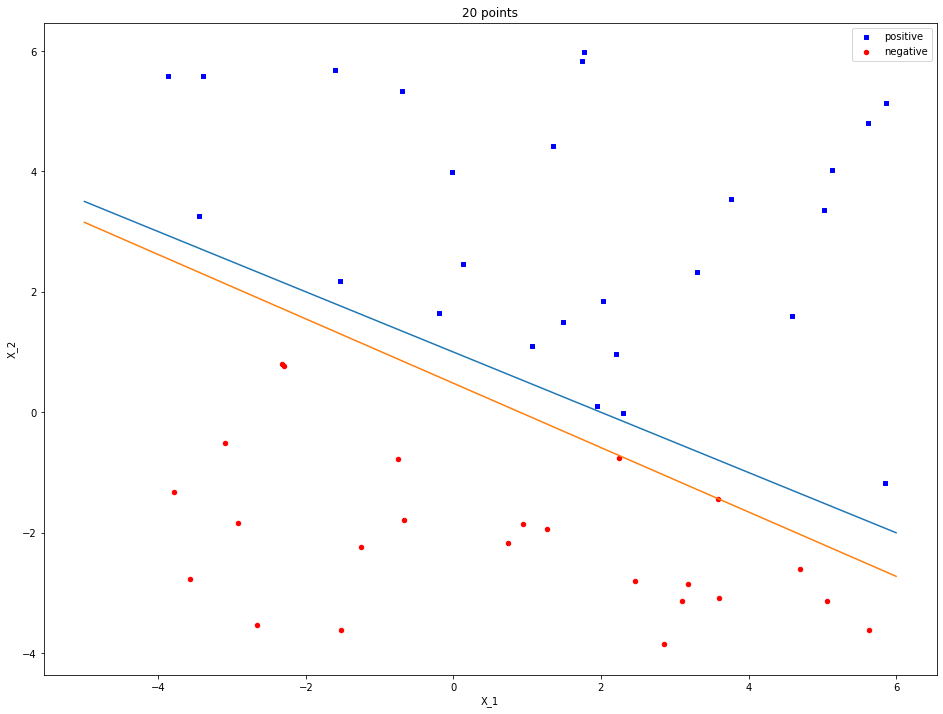

In [256]:
d1, d2 = createUniformNumbers(-4, 6, 50)
res = targetFunction(d1,d2)
plotPoints(d1,d2,res,-4,6)